# 'Recommendation of similar articles from journal abstract analysis'  
# Exploratory data analysis of arXiv submissions
## 2019, Misty M. Giles
### https://github.com/OhThatMisty/astro_categories/

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy import stats

plt.style.use('fivethirtyeight')

### Import the file and check the import

For this EDA, I'm going to add some temporary columns to the df for histograms, etc.  They won't be kept outside of this notebook.

The first 14 blocks will use the same data that was created in ArXiv_cleaning.ipynb, but I'll also take some information from 2015 and 2018 from the full set of ~137k abstracts to create a few additional plots at the end of this notebook to see if anything has changed in distribution.  This file was created using the same steps in ArXiv_cleaning.ipynb except for spaCy processing.

##### This is the file created in the cleaning notebook specifically for EDA, but I wrote the EDA report before adding some more abstracts for processing and then ran this notebook again.  The plots/stats in this notebook will match the plots/stats in the milestones 1 report by shape, but the y-axis ticks won't match.


In [2]:
file = os.path.join('..','data','astro_intermediate.csv')

file

'..\\data\\astro_intermediate.csv'

In [3]:
df = pd.read_csv(file, index_col=0)
df.head()

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text
0,We have constructed a Fourier-transform spectr...,"Zhaodi Pan, Mira Liu, Ritoban Basu Thakur, Bra...",Submitted to Applied Optics. [Copyright 2019 O...,Stephan S. Meyer,2019-05-17 17:57:11+00:00,astro-ph.IM,astro-ph.IM|physics.ins-det,A Compact Millimeter-Wavelength Fourier-Transf...,2019-05-17 17:57:11+00:00,http://arxiv.org/abs/1905.07399v1,We have constructed a Fourier transform spectr...
1,We report possible interaction between multipl...,"Kazuhito Dobashi, Tomomi Shimoikura, Nobuhiro ...",To appear in the Publications of the Astronomi...,Jean-Philippe Bernard,2019-05-17 17:48:17+00:00,astro-ph.GA,astro-ph.GA,Interaction between Northern Coal Sack in the ...,2019-05-17 17:48:17+00:00,http://arxiv.org/abs/1905.07395v1,We report possible interaction between multipl...
2,"Young, low-mass stars in the solar neighborhoo...","Adam C. Schneider, Evgenya L. Shkolnik, Kately...",Accepted for publication in the Astronomical J...,Laura Flagg,2019-04-15 17:10:00+00:00,astro-ph.SR,astro-ph.SR,ACRONYM III: Radial Velocities for 336 Candida...,2019-05-17 17:39:58+00:00,http://arxiv.org/abs/1904.07193v2,Young low mass stars in the solar neighborhood...
3,We investigate the energy extraction by the Pe...,Parthapratim Pradhan,Accepted in EPJC,Parthapratim Pradhan,2018-10-08 07:24:04+00:00,gr-qc,gr-qc|astro-ph.HE|hep-th,Study of energy extraction and epicyclic frequ...,2019-05-17 17:32:07+00:00,http://arxiv.org/abs/1810.03290v2,We investigate the energy extraction by the Pe...
4,We investigate the effect cosmological constan...,"Javad T. Firouzjaee, Alireza Allahyari",No comment found,Alireza Allahyari,2019-05-17 17:14:13+00:00,astro-ph.CO,astro-ph.CO|gr-qc,Black hole shadow with a cosmological constant...,2019-05-17 17:14:13+00:00,http://arxiv.org/abs/1905.07378v1,We investigate the effect cosmological constan...


### Time for some visual analysis.  First, how many categories do authors submit each article to?  

I'll split the categories in the 'terms' column on the pipes and count them.

In [4]:
df['terms_len'] = [len(x.split('|')) for x in df.terms]
df.terms_len.describe()

count    59972.000000
mean         1.657190
std          0.876997
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: terms_len, dtype: float64

Max = 7?  That's a huge number of categories.  I'll glance over a few entries as a whole for any obvious errors.  Then I'll check an entry with 7 categories more closely to see if this makes sense.

In [5]:
df.sort_values('terms_len', ascending=False)[:5]

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,terms_len
4296,We present the first application of deep learn...,"Hongyu Shen, E. A. Huerta, Zhizhen Zhao","8 pages, 4 figures and 4 tables",Zhizhen Zhao,2019-03-05 19:00:02+00:00,gr-qc,"gr-qc|astro-ph.HE|cs.AI|cs.LG|stat.ML|68T10, 8...",Deep Learning at Scale for Gravitational Wave ...,2019-03-05 19:00:02+00:00,http://arxiv.org/abs/1903.01998v1,We present the first application of deep learn...,7
5412,The advent of experimental science facilities-...,"E. A. Huerta, Roland Haas, Shantenu Jha, Mark ...","13 pages, 7 figures. Accepted to Computing and...",Daniel S. Katz,2018-10-06 21:13:01+00:00,cs.DC,cs.DC|astro-ph.HE|gr-qc|hep-ex|hep-ph|hep-th|9...,Supporting High-Performance and High-Throughpu...,2019-02-08 21:03:43+00:00,http://arxiv.org/abs/1810.03056v2,The advent of experimental science facilities ...,7
58479,We build the first analytic empirical potentia...,"Nikesh S. Dattani, Robert J. Le Roy","Feedback encouraged. 16 pages, 3 figures",Robert J. Le Roy,2015-08-28 12:44:45+00:00,physics.chem-ph,physics.chem-ph|astro-ph.SR|physics.atom-ph|ph...,State of the art for ab initio vs empirical po...,2015-08-28 12:44:45+00:00,http://arxiv.org/abs/1508.07184v1,We build the first analytic empirical potentia...,7
4261,Denoising of time domain data is a crucial tas...,"Hongyu Shen, Daniel George, E. A. Huerta, Zhiz...","5 pages, 11 figures and 3 tables, accepted to ...",Zhizhen Zhao,2019-03-06 19:00:02+00:00,astro-ph.CO,astro-ph.CO|astro-ph.IM|cs.LG|eess.SP|gr-qc|97...,Denoising Gravitational Waves with Enhanced De...,2019-03-06 19:00:02+00:00,http://arxiv.org/abs/1903.03105v1,Denoising of time domain data is a crucial tas...,7
40246,Celeste is a procedure for inferring astronomi...,"Jeffrey Regier, Kiran Pamnany, Ryan Giordano, ...",submitting to IPDPS'17,Prabhat,2016-11-10 17:16:04+00:00,cs.DC,cs.DC|astro-ph.IM|cs.LG|stat.AP|stat.ML|85A35 ...,Learning an Astronomical Catalog of the Visibl...,2016-11-10 17:16:04+00:00,http://arxiv.org/abs/1611.03404v1,Celeste is a procedure for inferring astronomi...,7


In [6]:
df.terms[12704]

'physics.hist-ph|astro-ph.EP|astro-ph.GA|astro-ph.HE|astro-ph.SR|nucl-ex|nucl-th'

In [7]:
df.title[12704]

'Women Scientists Who Made Nuclear Astrophysics'

In [8]:
df.abstract[12704]

"Female role models reduce the impact on women of stereotype threat, i.e., of being at risk of conforming to a negative stereotype about one's social, gender, or racial group. This can lead women scientists to underperform or to leave their scientific career because of negative stereotypes such as, not being as talented or as interested in science as men. Sadly, history rarely provides role models for women scientists; instead, it often renders these women invisible. In response to this situation, we present a selection of twelve outstanding women who helped to develop nuclear astrophysics."

Well, it makes sense for this article.  You can also see some weird five-digit codes like 97R40 or 68T10.  These are "Mathematical Subject Classifications," and authors can classify their papers with them as well as the subject codes.  Either way, it isn't a problem with the notebook code, so we're good to go.  

Next, how does this distribution look?  We already know from the .describe() above that more than half of the papers are only submitted to one category and three-quarters are submitted to two or fewer, with a mean of about 1.6 categories.

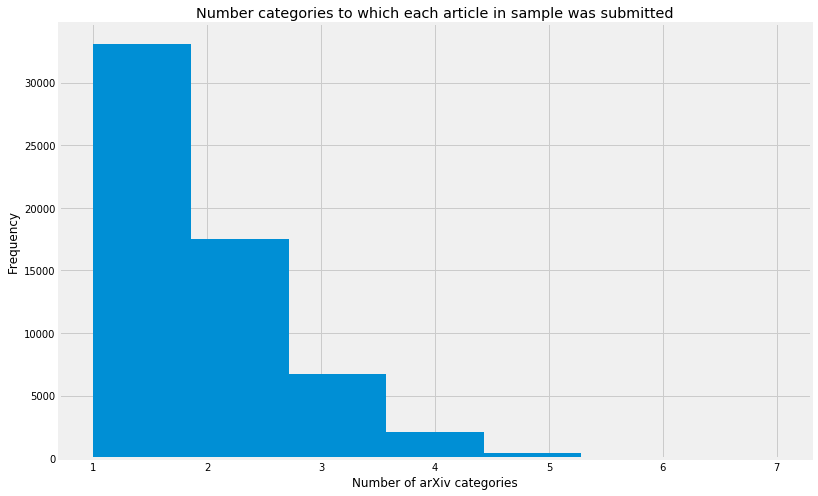

In [9]:
_ = plt.figure(figsize=(12,8))
_ = df.terms_len.plot(kind='hist', bins=7)
_ = plt.xlabel('Number of arXiv categories')
_ = plt.title('Number categories to which each article in sample was submitted')

One more category question: Which are the most popular categories?  How are submissions distributed?

In [10]:
cat_counts = pd.DataFrame.from_records([{
    'cosmology' : len(df.terms.loc[df.terms.str.contains('astro-ph.CO')]),
    'planetary' : len(df.terms.loc[df.terms.str.contains('astro-ph.EP')]),
    'galaxies' : len(df.terms.loc[df.terms.str.contains('astro-ph.GA')]),
    'high_energy' : len(df.terms.loc[df.terms.str.contains('astro-ph.HE')]),
    'instrument' : len(df.terms.loc[df.terms.str.contains('astro-ph.IM')]),
    'solar' : len(df.terms.loc[df.terms.str.contains('astro-ph.SR')])
}]).T.reset_index()

cat_counts.columns=['astro-ph category','article count']

cat_counts

,astro-ph category,article count
0,cosmology,13900
1,galaxies,18423
2,high_energy,14627
3,instrument,7064
4,planetary,7379
5,solar,14937


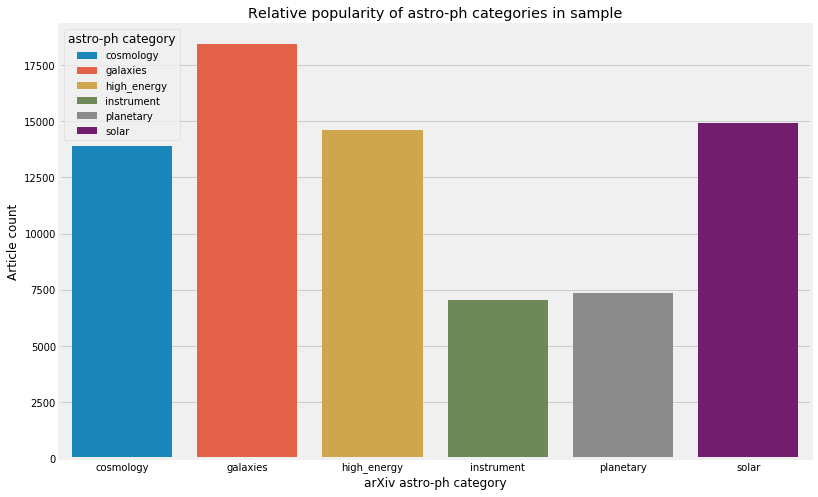

In [11]:
#cat_counts = cat_counts.sort_values(by='article count', ascending=False)

_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='astro-ph category', y='article count', hue='astro-ph category', data=cat_counts, dodge=False)
_ = plt.xlabel('arXiv astro-ph category')
_ = plt.ylabel('Article count')
_ = plt.title('Relative popularity of astro-ph categories in sample')

### Now on to the abstract lengths.  How many sentences are in abstracts?

In [12]:
df['sentences'] = [(entry.count('. ') + 1) for entry in df.abstract]
df.sentences.describe()

count    59972.000000
mean         7.729624
std          2.823887
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         31.000000
Name: sentences, dtype: float64

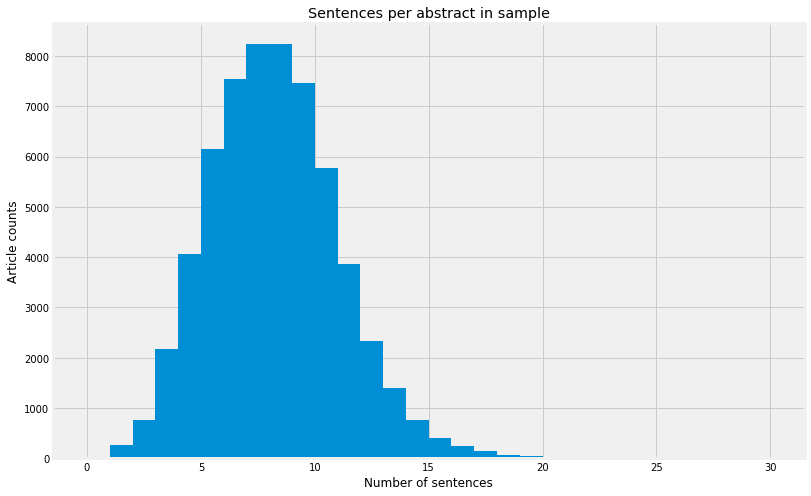

In [13]:
bins = np.arange(0, df.sentences.max())
_ = plt.figure(figsize=(12,8))
_ = df.sentences.plot(kind='hist', bins=bins)
_ = plt.xlabel('Number of sentences')
_ = plt.ylabel('Article counts')
_ = plt.title('Sentences per abstract in sample')

### And now, the statistics on the entire sample:

In [14]:
df.describe(include='all')

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,terms_len,sentences
count,59972,59972,59972,59972,59972,59972,59972,59972,59972,59972,59972,59972.000000,59972.000000
unique,59972,54544,43890,29509,57409,85,2497,59923,58875,59972,59970,NaN,NaN
top,Over two decades of exoplanetology have yielde...,Shahar Hod,No comment found,Abraham Loeb,2017-12-11 19:00:13+00:00,astro-ph.GA,astro-ph.GA,Highlights from the VERITAS AGN Observation Pr...,2019-01-22 19:00:00+00:00,http://arxiv.org/abs/1510.05539v2,ESPRESSO is an extremely stable high resolutio...,NaN,NaN
freq,1,49,3665,124,8,13887,9549,3,6,1,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.657190,7.729624
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876997,2.823887
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,10.000000


In [15]:
min(df.update_date)

'2015-07-14 06:29:37+00:00'

# Anything after this block is created using data that might not be explored in the rest of this notebook.

The full dataset was too much for my computer to parse, but I was curious about how the submissions might have changed over time.  Here I'll be looking at some year-by-year comparisons for category popularity and sentence length.  The df below (erroneously called df_137k) contains about 60k entries at this point -- it removed the 2019 data and added back in the first 7 months of 2015.  I originally used all 137k entries for the plots under this line, but I figured out that I only needed four (full) years to do the comparisons and dropped the extra rows.  

A future improvement could be the standardization across all notebooks to use the ~60k entries from 2015-2018.

In [16]:
file_137k = os.path.join('..','data','astro_eda_only.csv')

file_137k

'..\\data\\astro_eda_only.csv'

In [17]:
# Read in the entire file, create a column for the year information, and remove data before 2015 and the partial 2019
df_137k = pd.read_csv(file_137k, index_col=0)
df_137k['year'] = [year[:4] for year in df_137k.update_date]
df_137k = df_137k.loc[('2018' >= df_137k.year) & (df_137k.year >= '2015')]
df_137k.head(1)

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,year
7136,We study the chaotic-like behavior of cosmolog...,"Shy Genel, Greg L. Bryan, Volker Springel, Lar...",Key figures: 10 & 11. Accepted for publication...,Mark Vogelsberger,2018-07-18 18:00:08+00:00,astro-ph.GA,astro-ph.GA|astro-ph.IM,A Quantification of the Butterfly Effect in Co...,2018-12-31 23:27:27+00:00,http://arxiv.org/abs/1807.07084v2,We study the chaotic-like behavior of cosmolog...,2018


In [18]:
# Create the terms_len column in order to plot the number of categories to which each article is submitted
df_137k['terms_len'] = [len(x.split('|')) for x in df_137k.terms]
df_137k.terms_len.describe()

count    59605.000000
mean         1.653066
std          0.875368
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: terms_len, dtype: float64

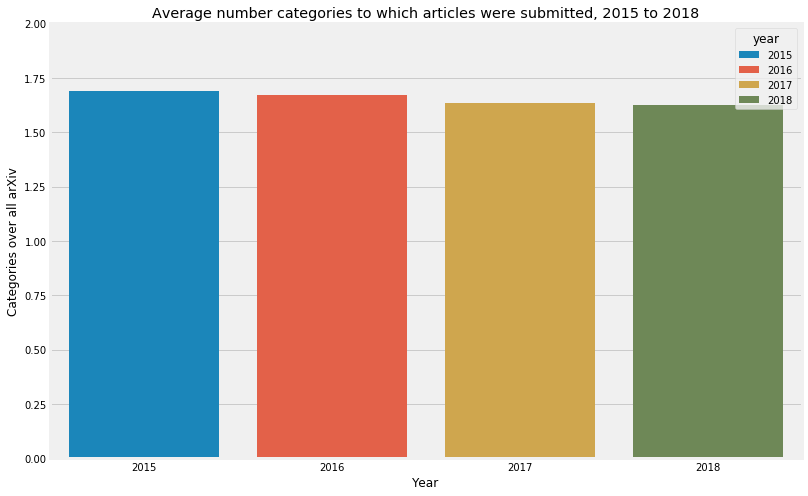

In [19]:
_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='year', y='terms_len', hue='year', data=df_137k, dodge=False, ci=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Categories over all arXiv')
_ = plt.title('Average number categories to which articles were submitted, 2015 to 2018')
_ = plt.ylim(0,2)

In [20]:
# Divide out the categories and the years of interest to plot changes
cat_counts = pd.DataFrame.from_records([{
    'cosmology_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.CO')) & (df_137k.year=='2015')]),
    'cosmology_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.CO')) & (df_137k.year=='2018')]),
    'planetary_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.EP')) & (df_137k.year=='2015')]),
    'planetary_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.EP')) & (df_137k.year=='2018')]),
    'galaxies_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.GA')) & (df_137k.year=='2015')]),
    'galaxies_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.GA')) & (df_137k.year=='2018')]),
    'high_energy_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.HE')) & (df_137k.year=='2015')]),
    'high_energy_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.HE')) & (df_137k.year=='2018')]),
    'instrument_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.IM')) & (df_137k.year=='2015')]),
    'instrument_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.IM')) & (df_137k.year=='2018')]),
    'solar_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.SR')) & (df_137k.year=='2015')]),
    'solar_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.SR')) & (df_137k.year=='2018')])
}]).T.reset_index()

cat_counts.columns=['astro-ph category','article count']

cat_counts['year'] = [year[-4:] for year in cat_counts['astro-ph category']]
cat_counts['astro-ph category'] = [cat[:-5] for cat in cat_counts['astro-ph category']]
cat_counts

,astro-ph category,article count,year
0,cosmology,3756,2015
1,cosmology,3422,2018
2,galaxies,3538,2015
3,galaxies,5180,2018
4,high_energy,3538,2015
5,high_energy,3660,2018
6,instrument,1392,2015
7,instrument,2055,2018
8,planetary,1598,2015
9,planetary,1971,2018


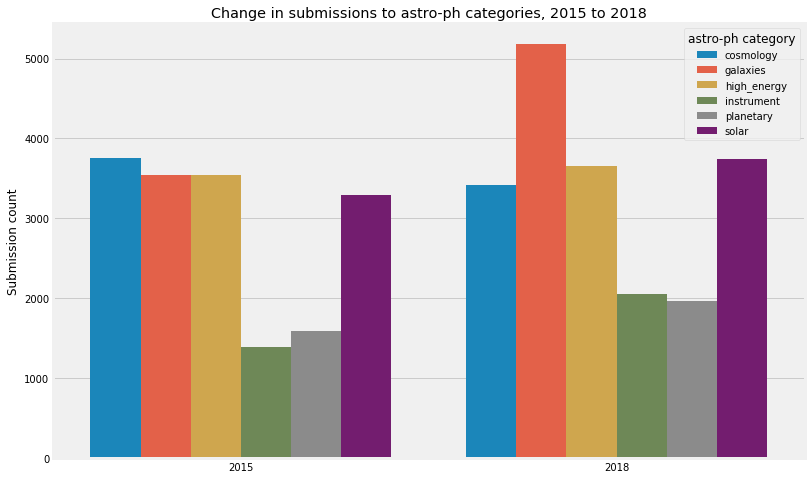

In [21]:
_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='year', y='article count', hue='astro-ph category', data=cat_counts)
_ = plt.xlabel('')
_ = plt.ylabel('Submission count')
_ = plt.title('Change in submissions to astro-ph categories, 2015 to 2018')

In [22]:
# NOTE: This will not equal the number of articles submitted to astro-ph categories
# per year (check last box)!  This is a count of the total astro-ph subcategory 
# submissions each year, as articles can be submitted to 1+ categories and can therefore
# be counted more than once.
sum_2015 = sum(cat_counts['article count'].loc[cat_counts.year=='2015'])
sum_2018 = sum(cat_counts['article count'].loc[cat_counts.year=='2018'])

sum_2015, sum_2018

(17120, 20027)

In [23]:
# Add a column for number of sentences to track averages
df_137k['sentences'] = [(entry.count('. ') + 1) for entry in df_137k.abstract]
df_137k.sentences.describe()

count    59605.000000
mean         7.735811
std          2.842063
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         31.000000
Name: sentences, dtype: float64

This plot justifies use of the t-test below that determines if a significant difference exists in the means of the different years.  The distribution has a bit of a tail, but it still approximates normal.  (The hist/KDE of the distribution do not change when outliers -- abstracts with more than 20 sentences -- are removed.)

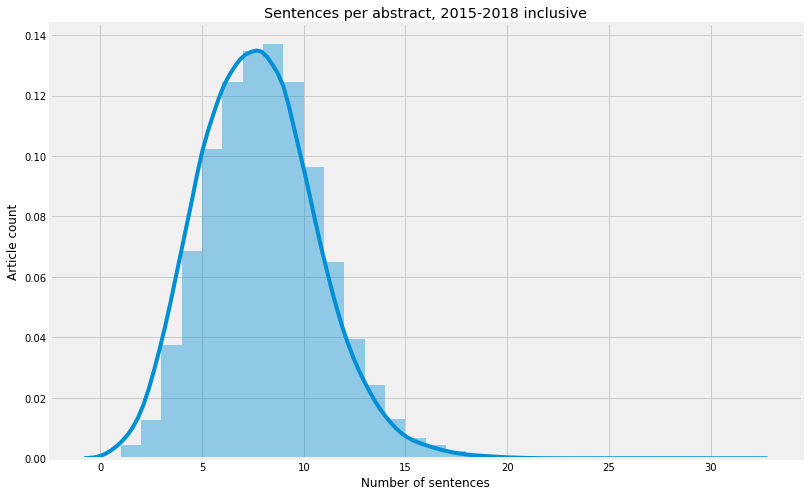

In [24]:
bins = np.arange(0, df_137k.sentences.max())
_ = plt.figure(figsize=(12,8))
_ = sns.distplot(df_137k.sentences, bins=bins, kde_kws={'bw':'.6'})
_ = plt.xlabel('Number of sentences')
_ = plt.ylabel('Article count')
_ = plt.title('Sentences per abstract, 2015-2018 inclusive')

T-test to check if the means of the different years have a significant difference in their means.  Tested 2018 to all three other years, then tested 2015 to the three other years.  2016 and 2017 results when compared to 2018: fail to reject H0 (means are statistically equal).  2015 compared to all three years: reject H0 (means are NOT statistically equal).

In [25]:
sentences_2015 = df_137k.loc[df_137k.year=='2015']
sentences_2016 = df_137k.loc[df_137k.year=='2016']
sentences_2017 = df_137k.loc[df_137k.year=='2017']
sentences_2018 = df_137k.loc[df_137k.year=='2018']

t_1815, p_1815 = stats.ttest_ind(sentences_2015.sentences, sentences_2018.sentences)
t_1816, p_1816 = stats.ttest_ind(sentences_2016.sentences, sentences_2018.sentences)
t_1817, p_1817 = stats.ttest_ind(sentences_2017.sentences, sentences_2018.sentences)

print('Statistical difference to 2018, independent t-test')
print('H0: year mean == 2018 mean, alpha = 0.05')
print('2015: t = {0:.4f},'.format(t_1815), 'p = {0:.4f}'.format(p_1815), '(reject H0)')
print('2016: t = {0:.4f},'.format(t_1816), 'p = {0:.4f}'.format(p_1816), '(fail to reject H0)')
print('2017: t = {0:.4f},'.format(t_1817), 'p = {0:.4f}'.format(p_1817), '(fail to reject H0)')

t_1516, p_1516 = stats.ttest_ind(sentences_2016.sentences, sentences_2015.sentences)
t_1517, p_1517 = stats.ttest_ind(sentences_2017.sentences, sentences_2015.sentences)

print('\nStatistical difference to 2015, independent t-test')
print('H0: year mean == 2018 mean, alpha = 0.05')
print('2016: t = {0:.4f},'.format(t_1516), 'p = {0:.4f}'.format(p_1516), '(reject H0)')
print('2017: t = {0:.4f},'.format(t_1517), 'p = {0:.4f}'.format(p_1517), '(reject H0)')
print('2018: t = {0:.4f},'.format(abs(t_1815)), 'p = {0:.4f}'.format(p_1815), '(reject H0)')

Statistical difference to 2018, independent t-test
H0: year mean == 2018 mean, alpha = 0.05
2015: t = -4.1892, p = 0.0000 (reject H0)
2016: t = 0.5661, p = 0.5713 (fail to reject H0)
2017: t = 0.2729, p = 0.7849 (fail to reject H0)

Statistical difference to 2015, independent t-test
H0: year mean == 2018 mean, alpha = 0.05
2016: t = 4.6501, p = 0.0000 (reject H0)
2017: t = 4.3901, p = 0.0000 (reject H0)
2018: t = 4.1892, p = 0.0000 (reject H0)


In [26]:
# Create a groupby to plot sentence averages
sent_counts = df_137k[['sentences', 'year']].groupby('year').mean().reset_index()

In [27]:
sent_counts

,year,sentences
0,2015,7.620370
1,2016,7.778595
2,2017,7.769159
3,2018,7.760435


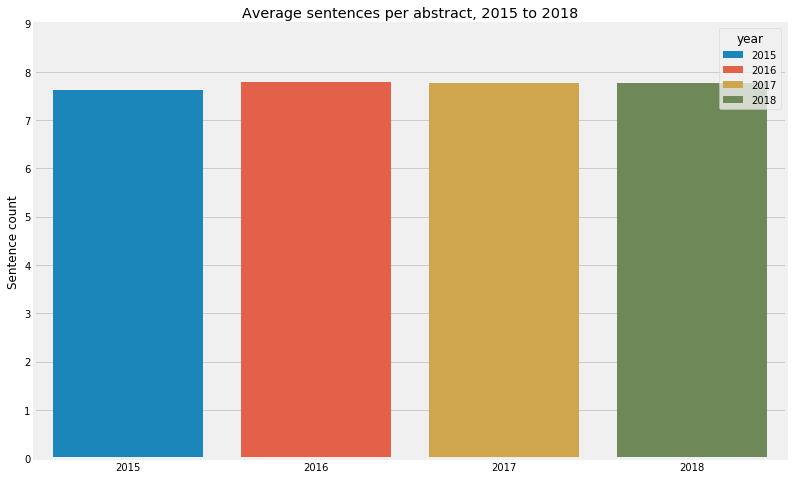

In [28]:
_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='year', y='sentences', hue='year', data=sent_counts, dodge=False)
_ = plt.xlabel('')
_ = plt.ylabel('Sentence count')
_ = plt.title('Average sentences per abstract, 2015 to 2018')
_ = plt.ylim(0, 9)

In [29]:
# This is the real number of how many articles were submitted during the time period.
submission_counts = df_137k[['abstract', 'year']].groupby('year').count().reset_index()
submission_counts.describe()

,abstract
count,4.000000
mean,14901.250000
std,1068.802874
min,13392.000000
25%,14661.000000
50%,15152.500000
75%,15392.750000
max,15908.000000


In [30]:
submission_counts

,year,abstract
0,2015,13392
1,2016,15221
2,2017,15084
3,2018,15908


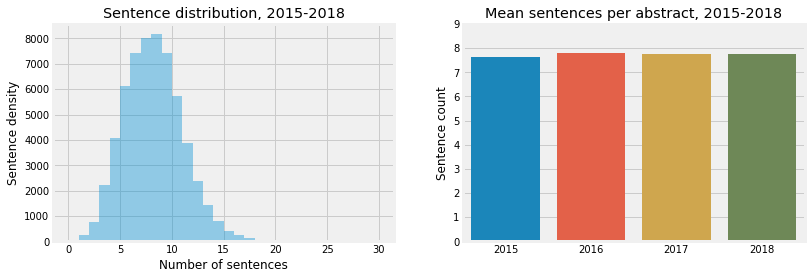

In [31]:
# Plot two previous plots in one plt.subplots() for the paper

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1 = sns.distplot(df_137k.sentences, bins=bins, kde=False, ax=ax1)
ax1.set_xlabel('Number of sentences')
ax1.set_ylabel('Sentence density')
ax1.set_title('Sentence distribution, 2015-2018')

ax2 = sns.barplot(x='year', y='sentences', hue='year', data=sent_counts, dodge=False)
ax2 = plt.xlabel('')
ax2 = plt.ylabel('Sentence count')
ax2 = plt.title('Mean sentences per abstract, 2015-2018')
ax2 = plt.ylim(0, 9)
legend = plt.legend()
legend.remove()

These are two random ecdfs that I wanted to use to verify normality.  I don't want to get rid of them.

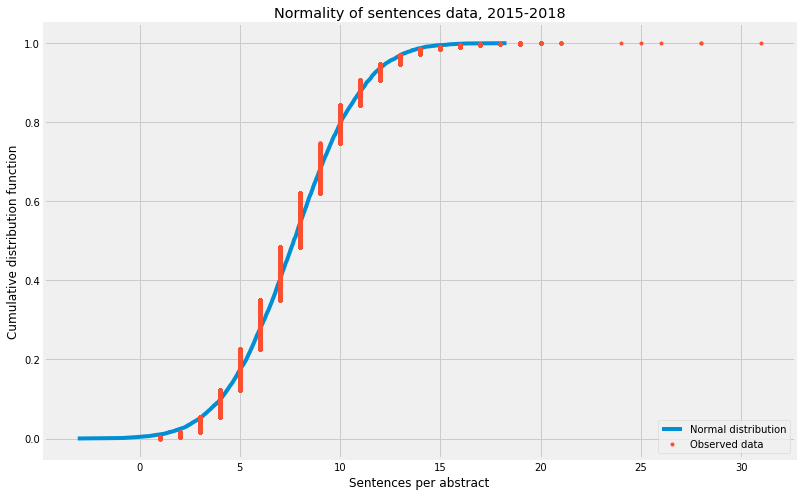

In [32]:
def ecdf(data):
    '''Compute continuous distribution function for one column'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Get x and y points from the sentences data and from a normal distribution with same statistics
x, y = ecdf(df_137k.sentences)
mean = np.mean(df_137k.sentences)
std = np.std(df_137k.sentences)
sample = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(sample)

# Plot ecdf of sentences and simulated normal distribution
_ = plt.figure(figsize=(12, 8))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.legend(('Normal distribution', 'Observed data'), loc='lower right')
_ = plt.xlabel('Sentences per abstract')
_ = plt.ylabel('Cumulative distribution function')
_ = plt.title('Normality of sentences data, 2015-2018')

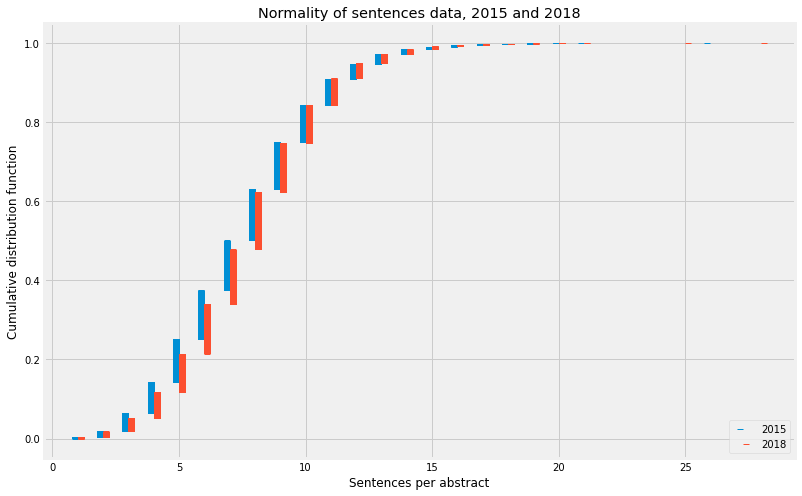

In [33]:
# Get x and y points from the sentences data and from a normal distribution with same statistics
x_15, y_15 = ecdf(df_137k.sentences.loc[df_137k.year == '2015'])
x_18, y_18 = ecdf(df_137k.sentences.loc[df_137k.year == '2018'])

# Plot ecdf of sentences and simulated normal distribution
_ = plt.figure(figsize=(12, 8))
_ = plt.plot(x_15, y_15, marker=0, linestyle='none')
_ = plt.plot(x_18, y_18, marker=1, linestyle='none')
_ = plt.legend(('2015', '2018'), loc='lower right')
_ = plt.xlabel('Sentences per abstract')
_ = plt.ylabel('Cumulative distribution function')
_ = plt.title('Normality of sentences data, 2015 and 2018')